In [2]:
import pandas as pd 
import numpy  as np
import seaborn as sns 
from matplotlib import pyplot as plt 
plt.style.use('dark_background')

Вітаю, шановні читачі!
Роблю ставку на те, що ви пов'язані з Data Analysis чи Data Science, раз вирішили зайти до мене на GitHub та подивитись на мої проєкти. Сьогодні в моїх планах - продемонструвати статистику, а саме дуже важливу тему - перевірку гіпотез та P-Value. Хочу зазначити, що це мої думки. Якщо ви в цьому знайдете щось корисне, буду дуже радий. Якщо знайдете помилки, це теж добре – є чому вчитись.

Отже, не буду повністю розповідати, що таке P-Value з точки зору статистики, а подивимось на це з точки зору програмування. І припускаю, що ви вже ознайомлені трошки з цією темою.

Так, на показник P-Value ми можемо дивитися орінтовано на різні статистичні тести, такі як T-test, ann whitney, та навіть 
через bootstrap. Але сьогодні я буду використовувати прийом 'Монте-Карло' ми будемо штучно симулювати наші дані та дивитися на результати. 
Отож приступимо.

Припустимо, що ми працюємо в IT компанії та у нас є свій додаток. Наша ціль - не просто мати свій застосунок, але покращити наш продукт, зробити його легше сприйняття для користувачів. Наприклад, якщо ми є банком, і у нас є мобільний застосунок, мета його створення - спростити роботу для користувачів.

Тепер уявімо, що до нас приходить наш менеджер та стверджує, що нашим додатком задоволено 80% користувачів. Це круто, але логічно би було перевірити, чи це правда. Вірити одному менеджеру непереконливо. Отже, ми вирішили провести перевірку гіпотези.

Сформулюємо гіпотезу: Нехай менеджер правий і нашим додатком задоволено 80% користувачів. Проте, яка ймовірність отримати такі або ще гірші результати? Для цього проведемо випадкове опитування 100 людей. Результат показав, що 75 із 100 задоволені.

Логіка полягає в перевірці, чи 80%, які стверджує менеджер, не є випадковістю. Отримані результати 75% є досить малоймовірними. Важливо зазначити, що ми акцентуємо увагу на односторонньому тесті, оскільки нас задовольняє будь-яке поліпшення результатів, але гірші результати нас не влаштовують.

Зараз ми переходимо до генерації даних.

In [24]:
np.random.binomial(1,0.8, size = 100).mean()

0.73

Як ми можемо побачити, що дійсно в ймовірності може бути така ситуація, де результат наш може бути навіть меншим, ніж той, що нам сказав менеджер? У нас є можливість перевірити це, наприклад, за допомогою симуляції даних.

In [80]:
np.mean([ np.random.binomial(1,0.8, size = 100).mean() <=0.75 for _ in range(10) ])

0.2

Ми взяли, сгенерували наш експеримент та поставили умову, що цей вираз <= чим наш реальний експеримент 0.75. І провели цей експеримент 10 раз. Хочу зазначити, що чим кількість проведень наших експериментів, тим вона є лінійною. Чим більше ми проведемо наших дослідів, тим краще і точніше буде значення. Давайте в наступному полі проведемо такий самий експеримент, але тільки 10000 раз.

In [81]:
np.mean([ np.random.binomial(1,0.8, size = 100).mean() <=0.75 for _ in range(10_000) ])

0.1323



Ось тут ми бачимо різницю між двома прикладами. Ми отримали 13 відсотків ймовірності, при тому що H0 (нульова гіпотеза) вірна. Отримати H1 (наша альтернатива) ймовірність складає 13%. Це багато для того, щоб прийняти нашу альтернативу і сказати, що, скоріш за все, менеджер нам сказав не дуже правильне твердження.

Це була перевірка гіпотез. Значення, яке ми отримали у вигляді 13%, - це наше P-Value. P-Value - це особливий тип ймовірності.

Таким чином, ми провели експеримент власноруч, зробили симуляцію. Але існує не один статистичний тест, який може виявити різницю між нашими гіпотезами. Давайте введемо наші дані у Z-Test.

In [82]:
from statsmodels.stats.proportion import proportions_ztest

In [83]:
proportions_ztest(75,100,value=0.8,alternative='smaller')

(-1.1547005383792526, 0.12410653949496159)

Отримали приблизно таке значення, як при нашому досліді. Слід зауважити, що Z-test працює на гіпотезі про нормальний розподіл.

<Axes: ylabel='Count'>

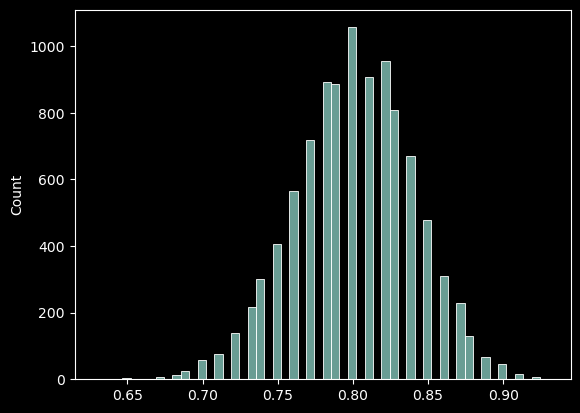

In [84]:
sns.histplot([np.random.binomial(1,0.8,size=100).mean() for _ in range(10000)])

За нашою теоремою ми бачимо, що середні значення розподілення "нормально". Наше середнє значення, яке частіше зустрічається, буде стояти посередині гістограми. Такі знання включає в себе Z-test, і йому не потрібно робити стільки експериментів, як нам; йому достатньо знати цю теорему. Також, ми наше значення P-Value можемо уявляти як площу. Якщо ми уявимо наші 12 відсотків на гістограмі, то сильно багато буде займати ця площа (отримати значення з альтернативної гіпотези при тому, що вірна нульова). Це добре все, ми трошки зрозуміли, що з себе уявляє перевірка гіпотез та P-value. Я вважаю, ми подивились на це досить реальному прикладі, і це був достатньо простий приклад. Тепер уявімо іншу ситуацію.

Ми, звісно, хочемо покращити наш додаток. Наразі не так важливо саме як, по всім фронтам нам треба його показати. Припустимо, що ми вирішили додати в наш застосунок нову функцію. Нехай наш банк став співпрацювати з якоюсь компанією. І ми вирішили весь кешбек, який отримують люди, повертати не на стару картку, а на створену нову при умові, що ціни в новому магазині куплених товарів з цієї картки будуть менші. І ми не знаємо реакції людей. Можливі декілька ісходів: або людям сподобається це і вони будуть користуватися нашим застосунком частіше, або люди скажуть, що їм було зручніше отримувати кешбек на стару картку і витрачати ці гроші на все, а не тільки на компанію, яка стала з нами співпрацювати. Можливо, клієнти ще зовсім не полюблять наш банк, і скажуть, що нормального кешбеку немає, і ми будемо користуватися іншими банками. Давайте згенеруємо таку ситуацію.

Конверсія на нашому лендінгу становить 10%. Покажемо нашу нову функцію тільки 30% користувачам.

In [89]:
df = pd.DataFrame({'group':['old landing (A)', 'new landing (B)'],
                   'lead':[700,300], 'users':[70,48]})

In [91]:
df['cr'] = df.users / df.lead

In [92]:
df

,group,lead,users,cr
0,old landing (A),700,70,0.10
1,new landing (B),300,48,0.16


Після проведення експерименту конверсія в ситуації з новою функцією, здається, є більшою, ніж раніше. Ми можемо сказати, що функція стала успішною. Але жарти в сторону. Ми розуміємо, що такі результати можна отримати абсолютно випадково. Тому нам треба перевірити, чи це правда. Сформулюємо нашу H0: нехай ніякої різниці немає між нашими лендінгами, і вони однакові. H1 буде такою, що різниця є. І яка ймовірність при тому, що різниці немає, отримати статистично значущі результати та зробити висновок, що різниця є між даними.

In [93]:
(70 + 48) / 1000

0.118

In [94]:
np.random.binomial(1,0.118,size=700).mean()

0.12142857142857143

In [95]:
np.random.binomial(1,0.118,size=300).mean()

0.12666666666666668

In [98]:
np.random.binomial(1,0.118,size=300).mean() - np.random.binomial(1,0.118,size=700).mean()

0.00904761904761904

Ми привели наші дані до однієї ймовірності. І якщо дійсно наш новий експеримент кращий, то коли ми будемо віднімати ймовірність старої конверсії від ймовірності нової, число повинно бути більше за нашу стару конверсію.

In [118]:
(np.random.binomial(1,0.118,size=300).mean() - np.random.binomial(1,0.118,size=700).mean()) > 0.06

False

In [119]:
abs(0.1 - 0.16)

0.06

у нас тут виходить різниця 6 відсотків

In [132]:
np.mean([abs( (np.random.binomial(1,0.118,size=300).mean() 
- np.random.binomial(1,0.118,size=700).mean())) > 0.06 for _ in range(10000) ]) 

0.0075

Беремо модуль, щоб дивитися вже на обидві сторони, результат може бути як кращим, так і гіршим. Ми тут отримали результат дуже малий, в нас немає відсотків. І ми можемо зробити висновок: ПРИ ТОМУ ЩО РІЗНИЦІ НІЯКОЇ НЕМАЄ, ОТРИМАТИ ТАКУ РІЗНИЦЮ І БІЛЬШЕ ЙМОВІРНІСТЬ МЕНШЕ ОДНОГО ВІДСОТКА. Отже, ми можемо зробити висновок, що ймовірність є дуже малою, для того щоб стверджувати, що H0 правильна. Майже такий самий результат ми отримаємо, якщо використаємо Z-test.

In [135]:
proportions_ztest([70,48],[700,300])

(-2.695166510284625, 0.007035346384355496)

Хочу ще сказати про деякі речі. Сама перевірка гіпотез в статистиці формалізована і є свого роду фреймворком. Ми йдемо за сценарієм. Так само ми оцінюємо нашу ймовірність. В статистиці прийнято відхиляти нульову гіпотезу при α = 0.05 (5%). Але в деяких ситуаціях нам потрібно знизити таку ймовірність аж до 1%, особливо в ситуаціях, де помилки неприпустимі. Але ми повинні розуміти, що ми все одно маємо ймовірність зробити помилку. Коли ми прийняли альтернативну гіпотезу, а була правильна основна, ми припустилися помилки першого роду. Ще гірше, коли не прийняли альтернативу, а вона була вірна. І весь сенс в тому, що α (альфа) ми обираємо до того, як проводити тест. Це наш поріг.

In [136]:
from tqdm.notebook import tqdm

In [138]:
n = 1000
result = []
for _ in tqdm(range(n)):
    a = np.random.binomial(1,0.118,size=700)
    b = np.random.binomial(1,0.118,size=300)
    diff = abs(a.mean() - b.mean())
    null_hyp_prob = np.concatenate([a,b]).mean()
    pval = np.mean([abs(np.random.binomial(1,null_hyp_prob,size=300).mean() 
    - np.random.binomial(1,null_hyp_prob,size=700).mean()) >= diff for _ in range(10000)])
    result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: ylabel='Count'>

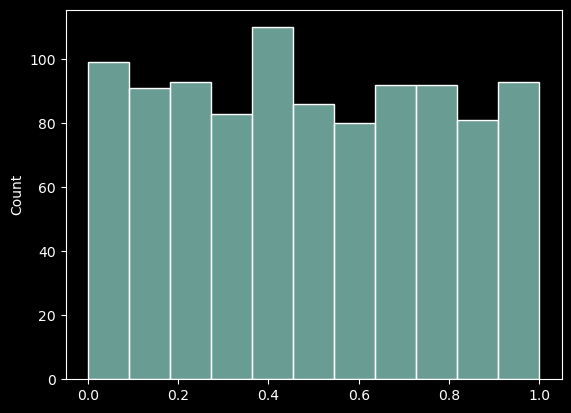

In [141]:
sns.histplot(pd.Series(result))

Далі наостанок я захотів додати такий факт: якщо в нас є порівняння між двома вибірками, в яких немає різниці, вони так сгенеровані. Якщо робити тест для вірної H0, що ніякої різниці немає, p-value буде розподілено нормально. Тоді наше P-Value буде на графіку мати нормальне розподілення. Якщо в вибірках є різниця, графік буде мати рівномірне розподілення.